    У даній роботі на основі даних по 615 спостреженнях за 10 ознаками спробуємо провести їх кластеризацію.
    У даній роботі розглянемо кластеризацію з використанням методу k means, ієрархічну кластеризацію і кластеризацію з використанням карт Кохонена.
    Також ми будемо порівнювати результати кластеризації різними алгоритмами.

In [1]:
# Data Preprocessing

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
df=pd.read_csv('Control Classification&Clustering (Tomilovych, EC-61).csv', sep=';', decimal=',')
df

Age Sex   ALB    ALP    ALT    AST   BIL  CHOL   CREA  Category
0     32   m  38.5   52.5    7.7   22.1   7.5  3.23  106.0         0
1     32   m  38.5   70.3   18.0   24.7   3.9  4.80   74.0         0
2     32   m  46.9   74.7   36.2   52.6   6.1  5.20   86.0         0
3     32   m  43.2   52.0   30.6   22.6  18.9  4.74   80.0         0
4     32   m  39.2   74.1   32.6   24.8   9.6  4.32   76.0         0
..   ...  ..   ...    ...    ...    ...   ...   ...    ...       ...
610   62   f  32.0  416.6    5.9  110.3  50.0  6.30   55.7         1
611   64   f  24.0  102.8    2.9   44.4  20.0  3.02   63.0         1
612   64   f  29.0   87.3    3.5   99.0  48.0  3.63   66.7         1
613   46   f  33.0    NaN   39.0   62.0  20.0  4.20   52.0         1
614   59   f  36.0    NaN  100.0   80.0  12.0  5.30   67.0         1

[615 rows x 10 columns]

    Змінну Category ми усунемо з датасету за вимогами роботи.

In [4]:
df.drop('Category', axis=1, inplace=True)

    Для початку проведемо попередню обробку даних, а саме кодування якісних змінних.

In [5]:
# Checking number of levels of categorical feature
print('Sex: '+str(df['Sex'].unique()))

Sex: ['m' 'f']


In [6]:
# Encoding categorical feature 'Sex'
from sklearn.preprocessing import LabelEncoder
df[['Sex']]=LabelEncoder().fit_transform(df[['Sex']])

C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [7]:
# Descriptive Statistics
df.describe()

Age         Sex         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean    47.408130    0.613008   41.620195   68.283920   28.450814   34.786341   
std     10.055105    0.487458    5.780629   26.028315   25.469689   33.090690   
min     19.000000    0.000000   14.900000   11.300000    0.900000   10.600000   
25%     39.000000    0.000000   38.800000   52.500000   16.400000   21.600000   
50%     47.000000    1.000000   41.950000   66.200000   23.000000   25.900000   
75%     54.000000    1.000000   45.200000   80.100000   33.075000   32.900000   
max     77.000000    1.000000   82.200000  416.600000  325.300000  324.000000   

              BIL        CHOL         CREA  
count  615.000000  605.000000   615.000000  
mean    11.396748    5.368099    81.287805  
std     19.673150    1.132728    49.756166  
min      0.800000    1.430000     8.000000  
25%      5.300000    4.610000    67.000000  
50%      7.300000    5.300000    77.000000  
75%     11.200000    6.060000    88.000000  
max    254.000000    9.670000  1079.100000

    Далі перевіримо розподіл ознак за нормальним законом.

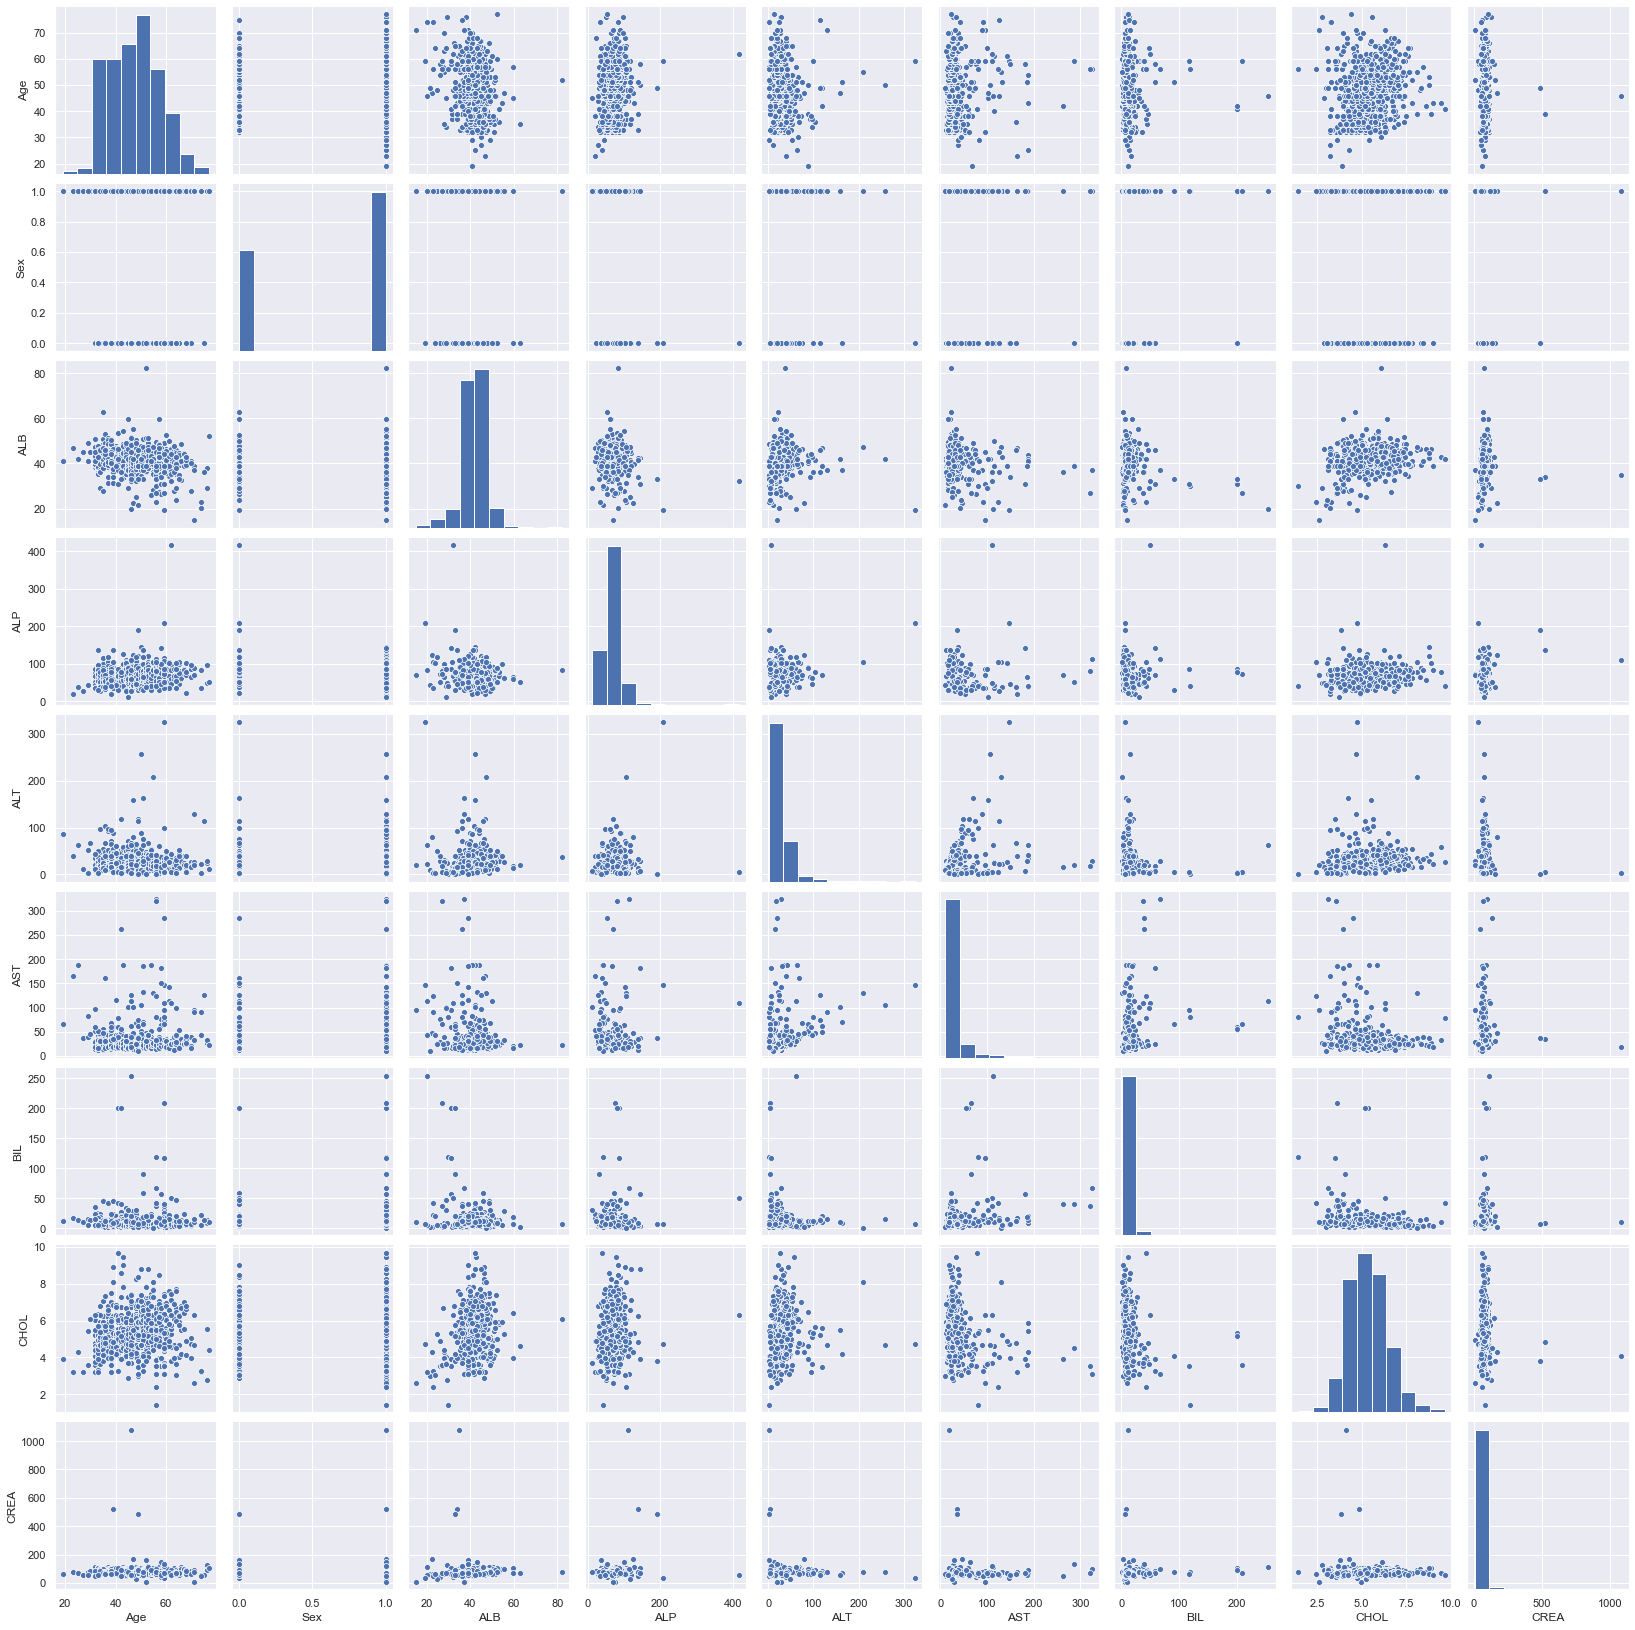

In [8]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, height = 2.5)
plt.show();

        Одна ознака приймає булеві значення, частина ознак розподілена по нормальному закону, а частина - ні. Для останніх проведемо логарифмування та перевіримо розподіл логарифмованих ознак.

In [9]:
# Log Transformations for Skewed Distributions
df_old=df
df[['ALT','AST', 'BIL', 'CREA']] = np.log(df[['ALT','AST', 'BIL', 'CREA']])
df.describe()

Age         Sex         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean    47.408130    0.613008   41.620195   68.283920    3.127743    3.368057   
std     10.055105    0.487458    5.780629   26.028315    0.660515    0.504072   
min     19.000000    0.000000   14.900000   11.300000   -0.105361    2.360854   
25%     39.000000    0.000000   38.800000   52.500000    2.797281    3.072693   
50%     47.000000    1.000000   41.950000   66.200000    3.135494    3.254243   
75%     54.000000    1.000000   45.200000   80.100000    3.498777    3.493473   
max     77.000000    1.000000   82.200000  416.600000    5.784748    5.780744   

              BIL        CHOL        CREA  
count  615.000000  605.000000  615.000000  
mean     2.079784    5.368099    4.346467  
std      0.696324    1.132728    0.280440  
min     -0.223144    1.430000    2.079442  
25%      1.667707    4.610000    4.204693  
50%      1.987874    5.300000    4.343805  
75%      2.415914    6.060000    4.477337  
max      5.537334    9.670000    6.983883

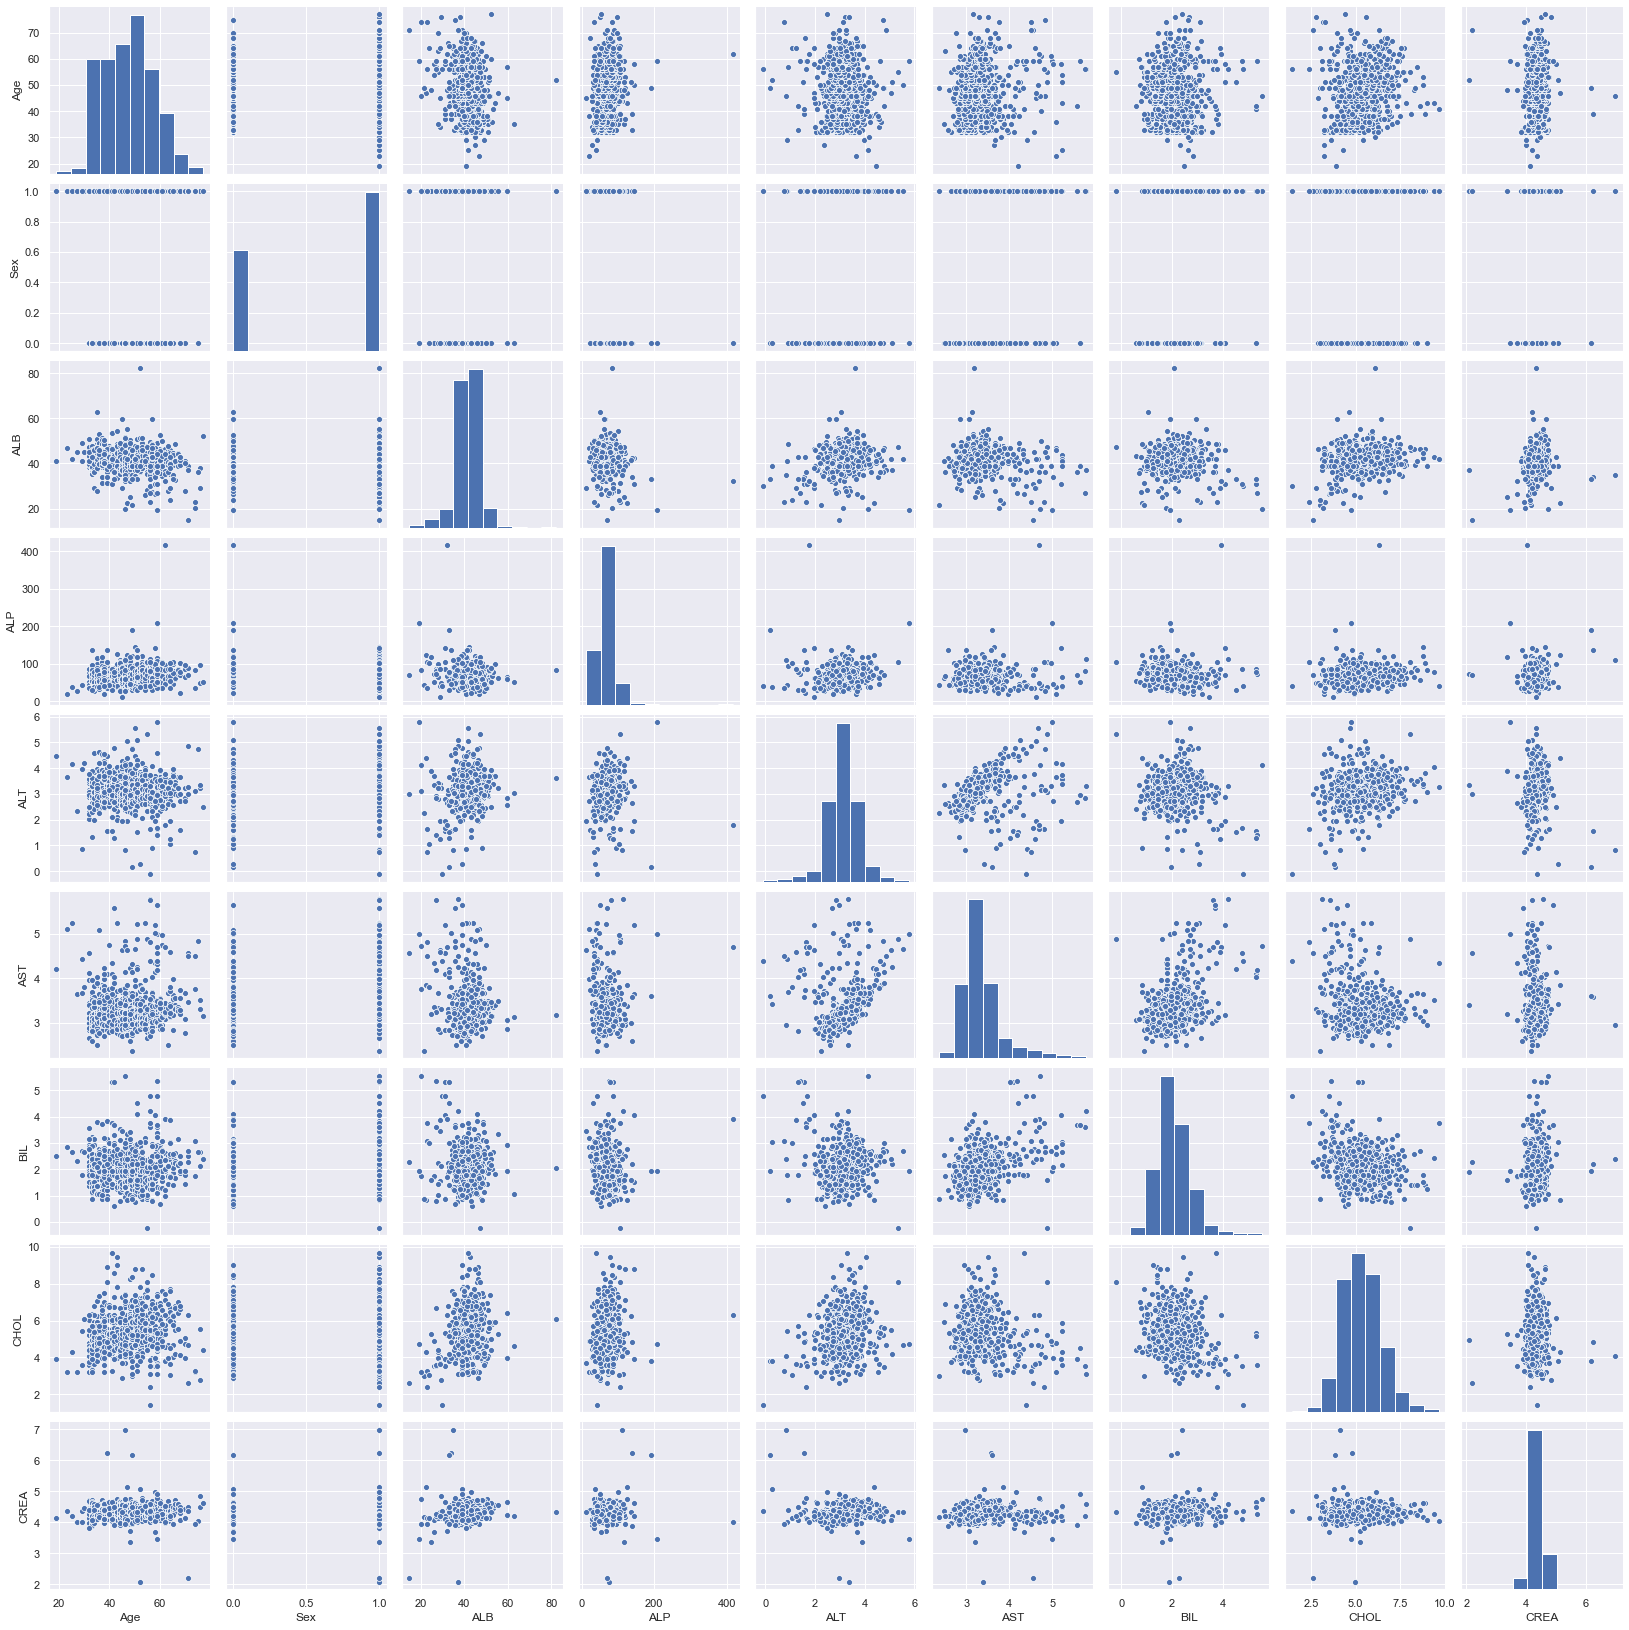

In [10]:
# Features distribution
sns.set()
sns.pairplot(df, height = 2.5)
plt.show();

        У результаті всі ознаки, які приймають небулеві значення, були приведені до нормального розподілу. Далі позбудемося викидів з кількісних ознак.

In [11]:
# Outliers
print('Outliers:')
j=0
for feature in ["Age", "ALB", "ALP", "ALT", "AST", "BIL", "CHOL", "CREA"]:
    observations=[]
    i=0
    for observation in df[feature]:
        if observation>round(df[feature].mean()+3*df[feature].std(), 1):
            observation=round(df[feature].mean()+3*df[feature].std(), 1)
            i=i+1
        elif observation<round(df[feature].mean()-3*df[feature].std(), 1):
            observation=round(df[feature].mean()-3*df[feature].std(), 1)
            i=i+1
        observations.append(observation)
    print(str(feature)+'\t'+str(i))
    j=j+i
    df[feature]=observations
print('GRAND TOTAL:\t'+str(j))

Outliers:
Age	0
ALB	13
ALP	3
ALT	11
AST	14
BIL	9
CHOL	5
CREA	7
GRAND TOTAL:	62


    Було усунуто 62 викиди з 7 кількісних ознак.

In [12]:
# Descriptive Statistics
df.describe()

Age         Sex         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean    47.408130    0.613008   41.622638   67.653601    3.132060    3.359178   
std     10.055105    0.487458    5.378129   21.124309    0.627839    0.470712   
min     19.000000    0.000000   24.300000   11.300000    1.100000    2.360854   
25%     39.000000    0.000000   38.800000   52.500000    2.797281    3.072693   
50%     47.000000    1.000000   41.950000   66.200000    3.135494    3.254243   
75%     54.000000    1.000000   45.200000   80.100000    3.498777    3.493473   
max     77.000000    1.000000   59.000000  146.400000    5.100000    4.900000   

              BIL        CHOL        CREA  
count  615.000000  605.000000  615.000000  
mean     2.070175    5.366033    4.344952  
std      0.656230    1.119590    0.213073  
min     -0.000000    2.000000    3.500000  
25%      1.667707    4.610000    4.204693  
50%      1.987874    5.300000    4.343805  
75%      2.415914    6.060000    4.477337  
max      4.200000    8.800000    5.200000

        Далі проведемо перевірку наявності відсутніх значень.

In [13]:
# Cheking NaN
nan_by_column=df.isnull().sum()
print(nan_by_column)

Age      0
Sex      0
ALB      1
ALP     18
ALT      1
AST      0
BIL      0
CHOL    10
CREA     0
dtype: int64


    Відсутні значення були виявлені тільки в кількісних змінних, тому замінимо їх середнім значенням.

In [14]:
# Taking care of missing data
from sklearn.impute import SimpleImputer

df[['ALB']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['ALB']])
df[['ALB']]=round(df[['ALB']], 1)

df[['ALP']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['ALP']])
df[['ALP']]=round(df[['ALP']], 1)

df[['ALT']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['ALT']])
df[['ALT']]=round(df[['ALT']], 1)

df[['CHOL']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['CHOL']])
df[['CHOL']]=round(df[['CHOL']], 1)

In [15]:
# Descriptive Statistics
df.describe()

Age         Sex         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  615.000000  615.000000  615.000000  615.000000   
mean    47.408130    0.613008   41.622602   67.654959    3.133333    3.359178   
std     10.055105    0.487458    5.373747   20.812367    0.628926    0.470712   
min     19.000000    0.000000   24.300000   11.300000    1.100000    2.360854   
25%     39.000000    0.000000   38.800000   52.950000    2.800000    3.072693   
50%     47.000000    1.000000   41.900000   66.700000    3.100000    3.254243   
75%     54.000000    1.000000   45.200000   79.300000    3.500000    3.493473   
max     77.000000    1.000000   59.000000  146.400000    5.100000    4.900000   

              BIL        CHOL        CREA  
count  615.000000  615.000000  615.000000  
mean     2.070175    5.366179    4.344952  
std      0.656230    1.111105    0.213073  
min     -0.000000    2.000000    3.500000  
25%      1.667707    4.600000    4.204693  
50%      1.987874    5.300000    4.343805  
75%      2.415914    6.050000    4.477337  
max      4.200000    8.800000    5.200000

    Для задачі кластеризації ознаки були прошкальовані за методом MinMax, що привело їх усіх у інтервал [0; 1].

In [16]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
cols=df.columns
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns=cols)
df.describe()

Age         Sex         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  615.000000  615.000000  615.000000  615.000000   
mean     0.489795    0.613008    0.499210    0.417135    0.508333    0.393173   
std      0.173364    0.487458    0.154863    0.154052    0.157232    0.185382   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.344828    0.000000    0.417867    0.308290    0.425000    0.280346   
50%      0.482759    1.000000    0.507205    0.410067    0.500000    0.351846   
75%      0.603448    1.000000    0.602305    0.503331    0.600000    0.446063   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              BIL        CHOL        CREA  
count  615.000000  615.000000  615.000000  
mean     0.492899    0.495026    0.497031  
std      0.156245    0.163398    0.125337  
min      0.000000    0.000000    0.000000  
25%      0.397073    0.382353    0.414525  
50%      0.473303    0.485294    0.496356  
75%      0.575218    0.595588    0.574904  
max      1.000000    1.000000    1.000000

    Далі побудуємо кореляційну матрицю, щоб обрати з неї змінні, які мають найбільше варіативність.

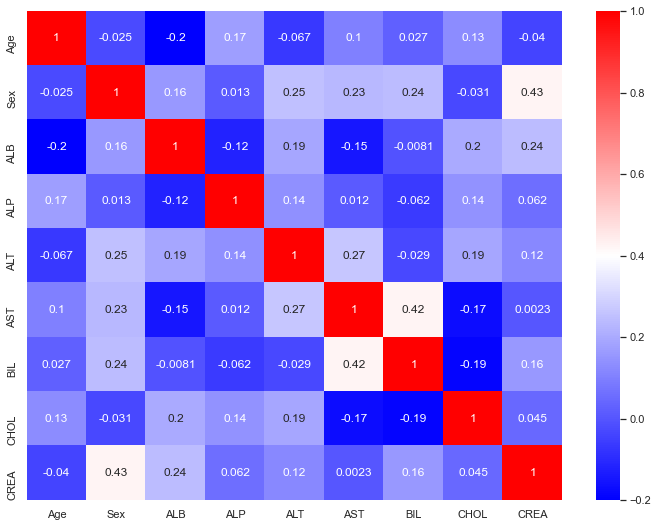

In [17]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, cmap='bwr')
plt.show()

    Матриця не має достатньо високих показників кореляції між змінними, що показує на не дуже високу їхню варіативність. Тому спочатку розглянемо кластеризацію за методом k-means.
    Для цього визначимо оптимальне число кластерів за правилом ліктя і критерієм силуету.

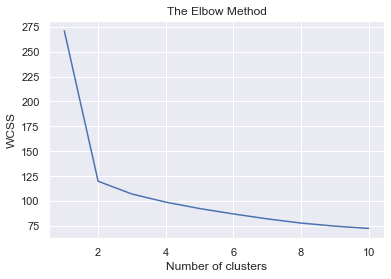

In [18]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

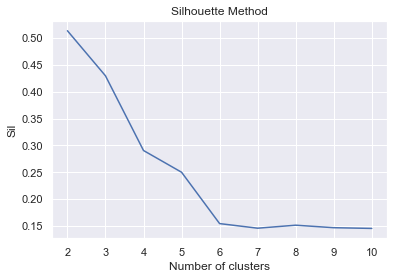

2:0.5135335552411607
3:0.42957613124128674
4:0.2903769896703262
5:0.2498911738926506
6:0.15419835898537362
7:0.14561966137809892
8:0.15122015446419662
9:0.14653815340762338
10:0.14521196591164534


In [19]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 11), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

    І за правилом ліктя, і за критерієм силуету оптимальним числом кластерів є 2. Проведемо кластеризацію спостережень на основі вибірки за методом k-means.

In [20]:
# K-Means (2 clusters, all features)

In [21]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123).fit_predict(df)
kms = KMeans(n_clusters = 2, random_state = 123).fit(df)
pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.DataFrame(kms.cluster_centers_, columns = df.columns)

Age      Sex      ALB      ALP      ALT      AST      BIL     CHOL  \
0 0.495146 0.000000 0.468639 0.414645 0.458929 0.338445 0.445623 0.501483   
1 0.486417 1.000000 0.518510 0.418707 0.539523 0.427723 0.522744 0.490950   

      CREA  
0 0.429916  
1 0.539400

In [22]:
# Descriptive Statistics
df.describe()

Age        Sex        ALB        ALP        ALT        AST  \
count 615.000000 615.000000 615.000000 615.000000 615.000000 615.000000   
mean    0.489795   0.613008   0.499210   0.417135   0.508333   0.393173   
std     0.173364   0.487458   0.154863   0.154052   0.157232   0.185382   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.344828   0.000000   0.417867   0.308290   0.425000   0.280346   
50%     0.482759   1.000000   0.507205   0.410067   0.500000   0.351846   
75%     0.603448   1.000000   0.602305   0.503331   0.600000   0.446063   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

             BIL       CHOL       CREA  
count 615.000000 615.000000 615.000000  
mean    0.492899   0.495026   0.497031  
std     0.156245   0.163398   0.125337  
min     0.000000   0.000000   0.000000  
25%     0.397073   0.382353   0.414525  
50%     0.473303   0.485294   0.496356  
75%     0.575218   0.595588   0.574904  
max     1.000000   1.000000   1.000000

    Можна побачити, що центри кластерів не дуже віддалені один від одного по всіх координатах, а також від середнього значення цієї координати для всіх спостережень, окрім Sex. Аби перевірити деяке припущення перевіримо коефіцієнт збігу значень ознаки Sex і кластерів.

In [23]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
sex=df.iloc[:, 1]
adjusted_rand_score(km, sex)

1.0

    Можна побачити, що кластери, кількість яких є оптимальною, відповідають поділу вибірки за статтю. Звідси всі інші змінні є не надто варіативними або їхні значення розподілені таким чином по вибірці, що не можливо провести кластеризацію за ними.

In [63]:
df

Age      Sex      ALB      ALP      ALT      AST      BIL     CHOL  \
0   0.224138 1.000000 0.409222 0.304959 0.225000 0.289359 0.479739 0.176471   
1   0.224138 1.000000 0.409222 0.436714 0.450000 0.333163 0.324042 0.411765   
2   0.224138 1.000000 0.651297 0.469282 0.625000 0.630866 0.430545 0.470588   
3   0.224138 1.000000 0.544669 0.301258 0.575000 0.298170 0.699800 0.397059   
4   0.224138 1.000000 0.429395 0.464841 0.600000 0.334754 0.538515 0.338235   
..       ...      ...      ...      ...      ...      ...      ...      ...   
610 0.741379 0.000000 0.221902 1.000000 0.175000 0.922495 0.931434 0.632353   
611 0.775862 0.000000 0.000000 0.677276 0.000000 0.564121 0.713270 0.147059   
612 0.775862 0.000000 0.135447 0.562546 0.050000 0.879928 0.921715 0.235294   
613 0.465517 0.000000 0.250720 0.417469 0.650000 0.695620 0.713270 0.323529   
614 0.689655 0.000000 0.337176 0.417469 0.875000 0.796005 0.591644 0.485294   

        CREA  
0   0.684376  
1   0.472979  
2   0.561381  
3   0.518839  
4   0.488667  
..       ...  
610 0.305871  
611 0.378315  
612 0.411885  
613 0.265437  
614 0.414525  

[615 rows x 9 columns]

    Таким чином кластеру 0 відповідають жінки, а кластеру 1 - чоловіки. Перевіримо чи повторюється така кластеризація на основі всіх змінних при ієрархічній кластеризації.

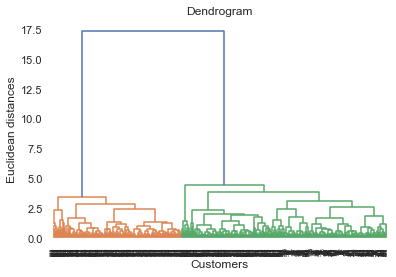

In [24]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

    З дендограми видно, що оптимальною кількістю кластерів є 2. Виділимо їх за методом ієрархічної кластеризації і порівняємо з результатами кластеризації за методом k-means.

In [25]:
# Hierarchical Clustering (2 clusters, all features)

In [26]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [27]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km, hc)

1.0

    Можна побачити, що ієрархічна кластеризація дала ті самі результати, що й за k means, тобто знову можна стверджувати, що значущою ознакою є тільки Sex. Очевидно при використанні тільки цієї змінної для кластеризації буде отримано той же результат.
    Тому спробуємо розглянути кластеризацію з використанням усіх ознак за допомогою карт Кохонена, аби порівняти отримані результати.

In [28]:
# SOM (2 clusters, all features)

In [29]:
import SimpSOM as sps
np.random.seed(123456789)
df_array=df.values
net = sps.somNet(13, 10, df_array, PBC=True)
net.train(0.01, 2000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


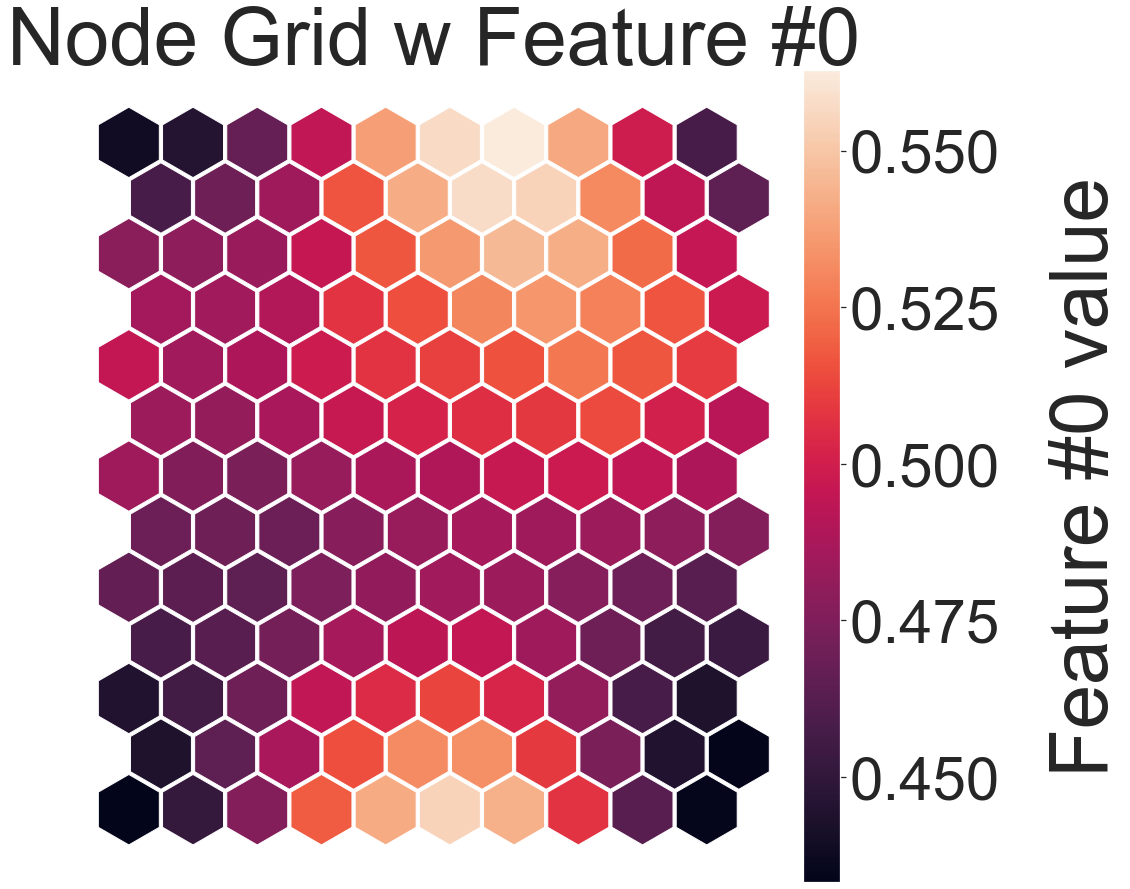

In [30]:
net.nodes_graph(colnum=0)

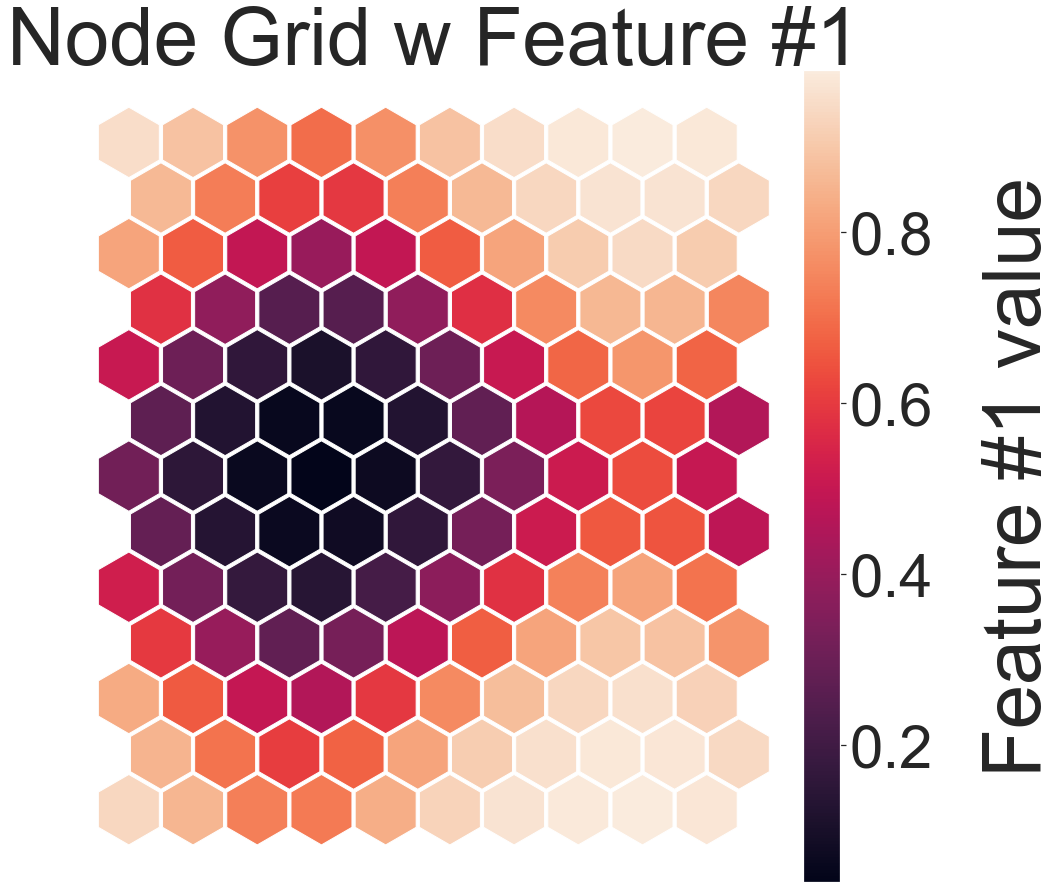

In [31]:
net.nodes_graph(colnum=1)

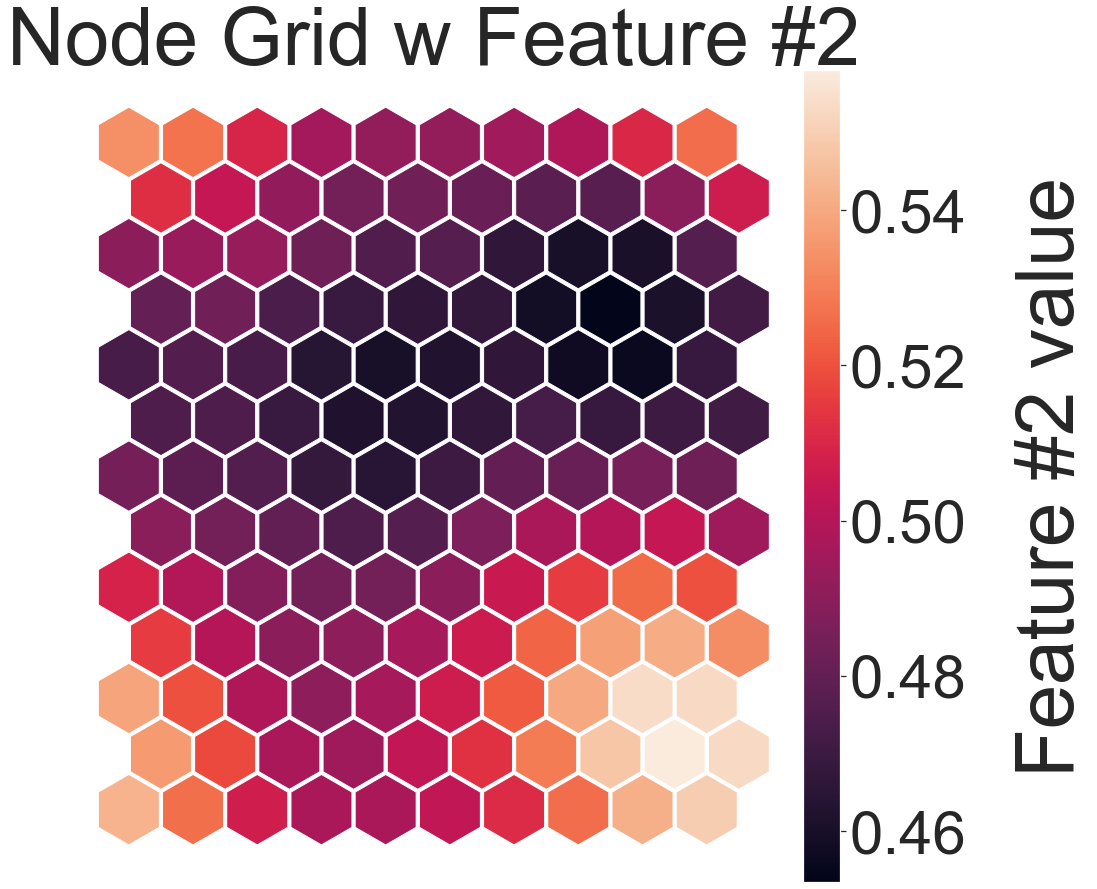

In [32]:
net.nodes_graph(colnum=2)

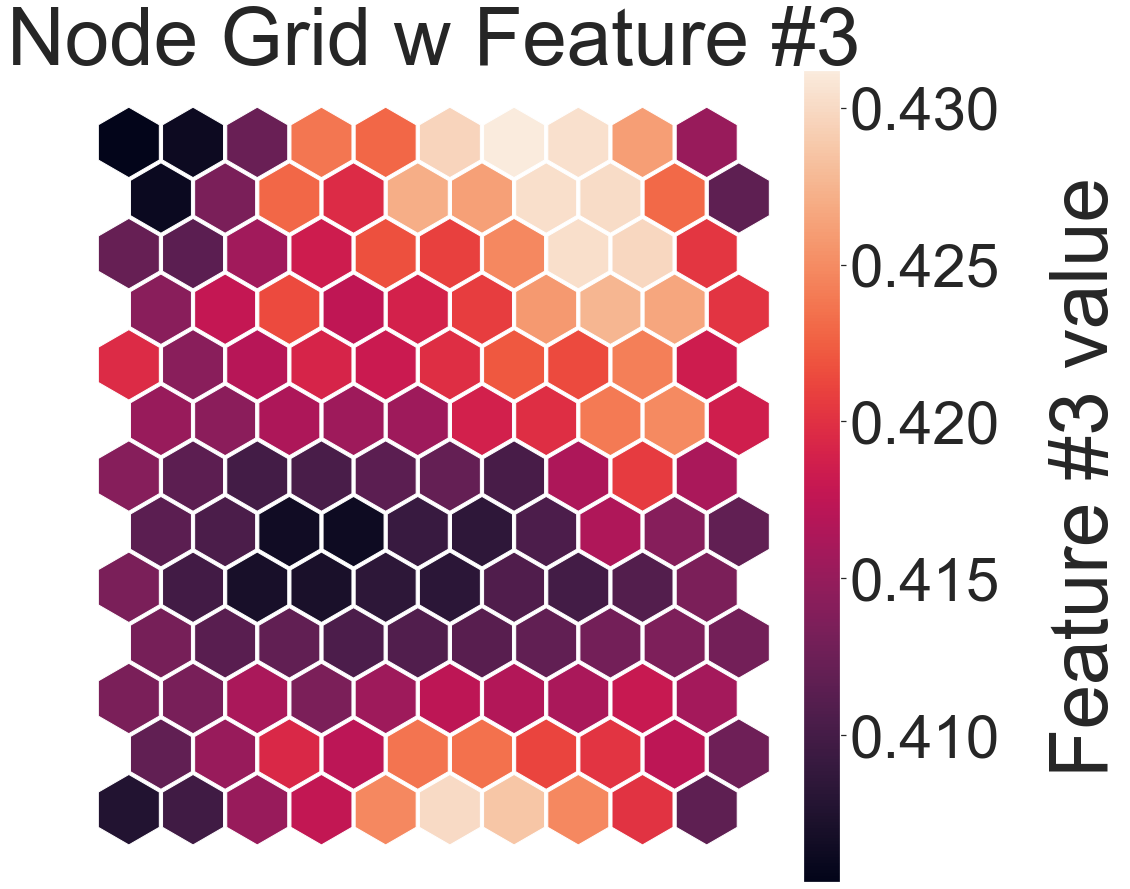

In [33]:
net.nodes_graph(colnum=3)

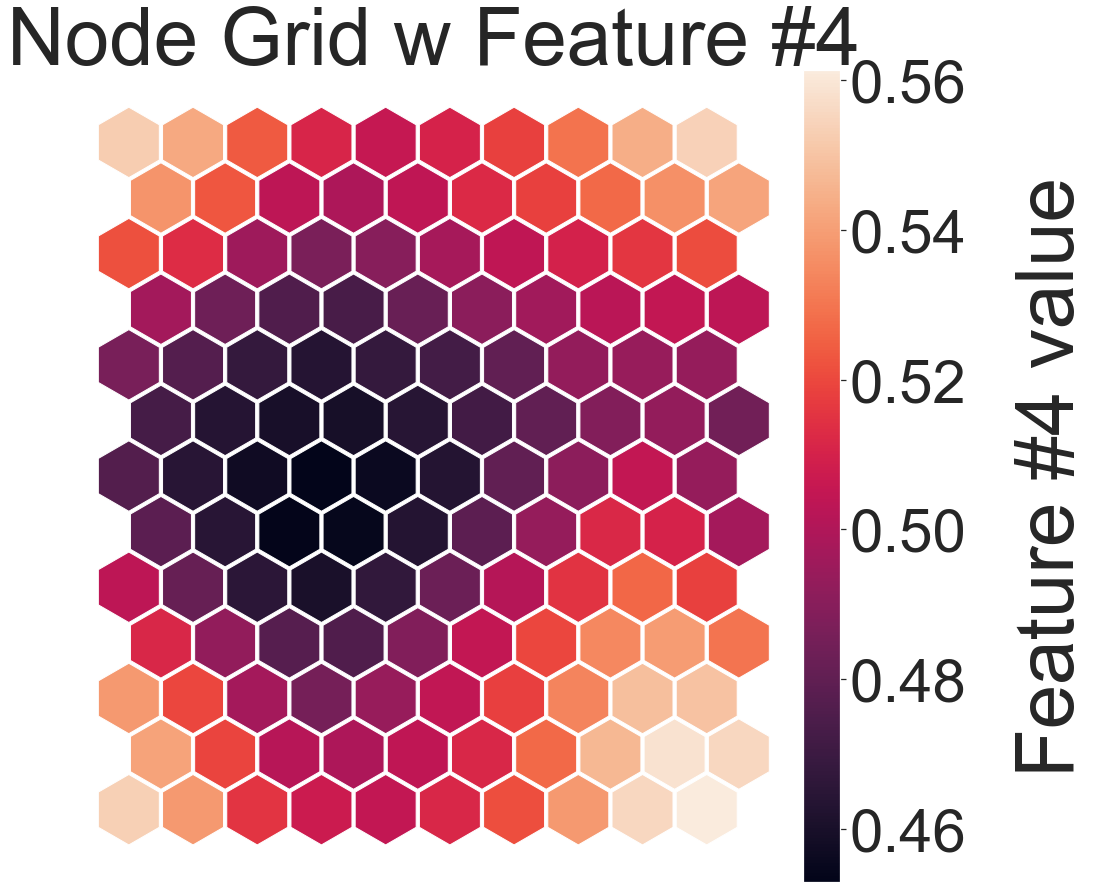

In [34]:
net.nodes_graph(colnum=4)

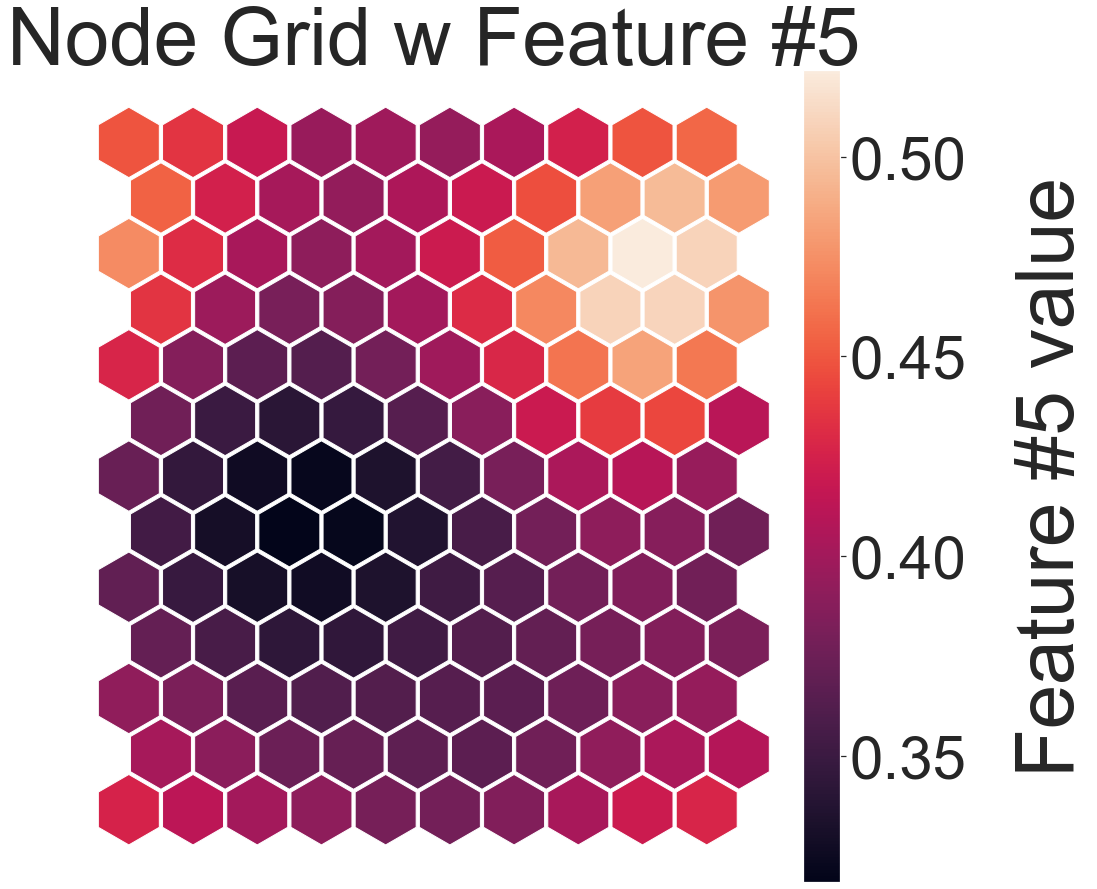

In [35]:
net.nodes_graph(colnum=5)

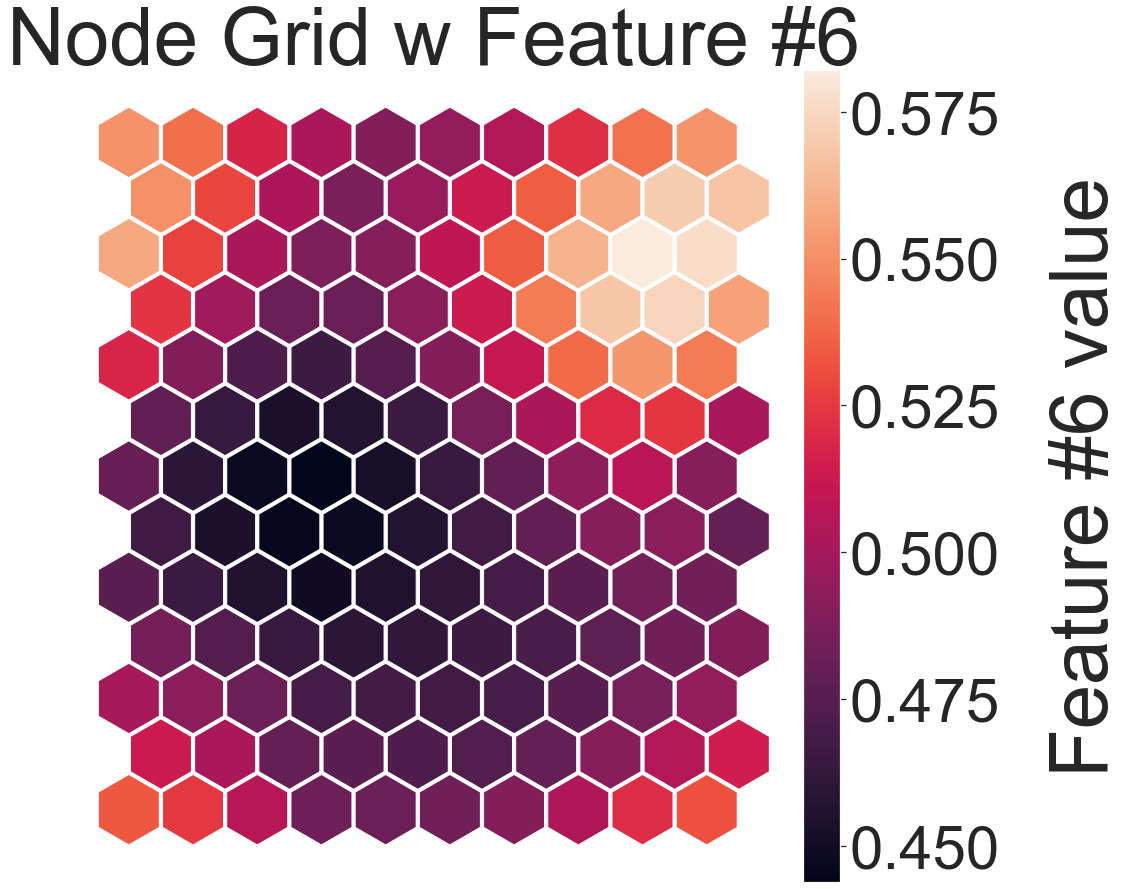

In [36]:
net.nodes_graph(colnum=6)

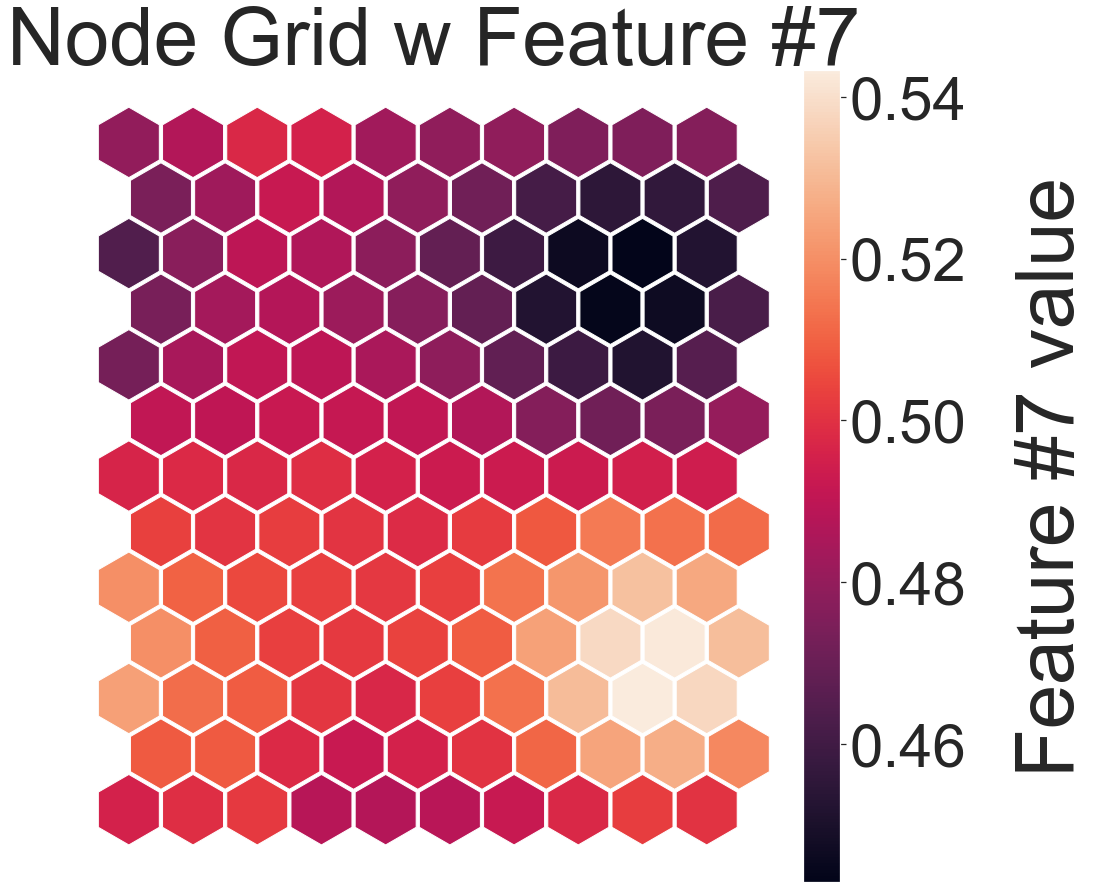

In [37]:
net.nodes_graph(colnum=7)

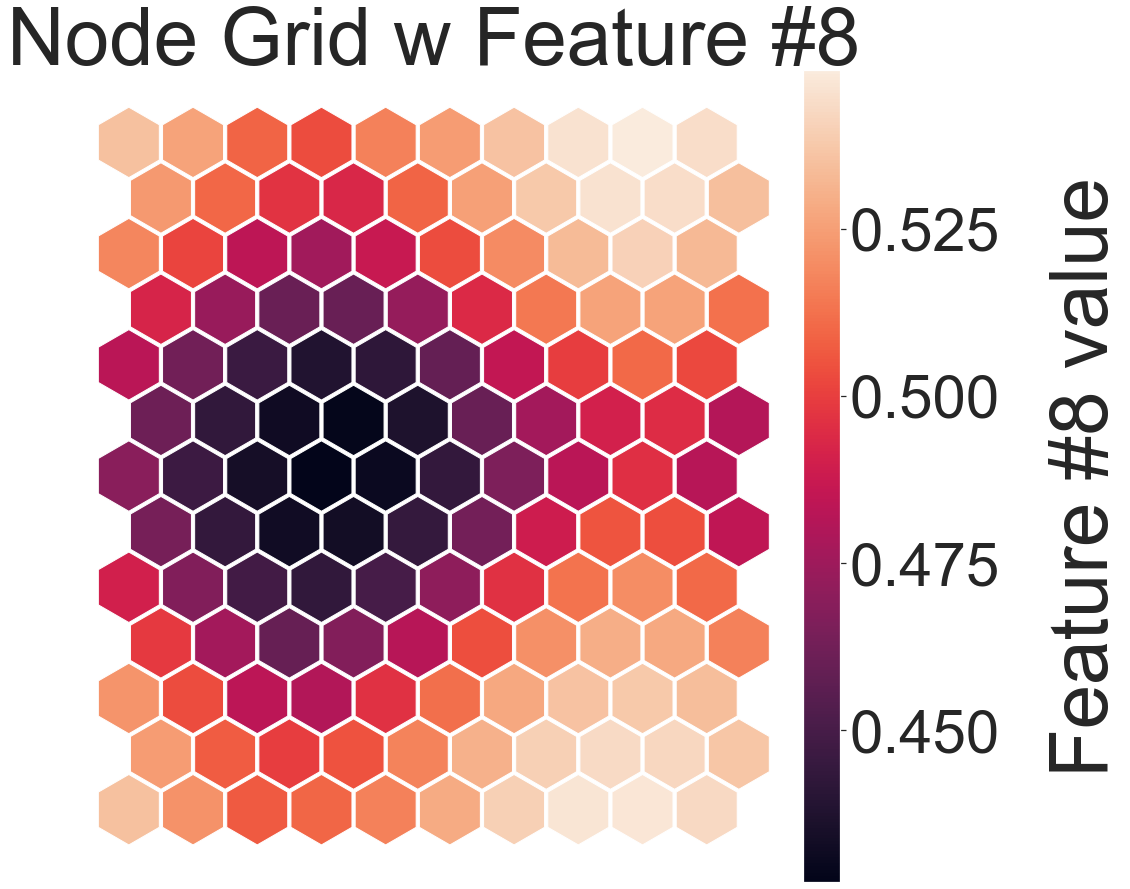

In [38]:
net.nodes_graph(colnum=8)

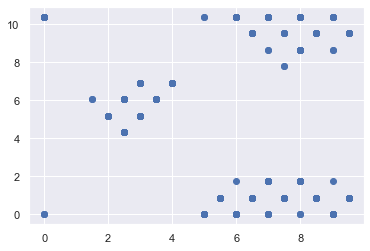

In [39]:
prj=np.array(net.project(df.values))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

    З отриманого графіку можна побачити, що цілком можливо виділити більше кластерів, ніж 2. Припасуємо результати самонавчання карти Кохонена до 2 кластерів і порівняємо їх з результатами інших алгоритмів.

In [40]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=123).fit(prj)

In [41]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(kmeans.labels_, km)

0.2586813876389036

    Можна побачити, що кластеризація з використанням карт Кохонена не тотожна іншим методам кластеризації, а отже цілком можливим і доречним є розгляд більшої кількості кластерів.
    Що ж до кластеризації картою Кохонена тільки за змінною Sex, то очевидно, що її немає сенсу проводити, оскільки точно буде отримане розбиття на кластери за статтю, а отримання якогось іншого результату є нелогічним.

    Розглянемо кластеризацію з поділом вибірки на 3 кластери за методом k means.

In [42]:
# K-Means (3 clusters, all features)

In [43]:
# Fitting K-Means to the dataset
km1 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123).fit_predict(df)
kms1 = KMeans(n_clusters = 3, random_state = 123).fit(df)
pd.DataFrame(kms1.cluster_centers_, columns = df.columns)

Age      Sex      ALB      ALP      ALT      AST      BIL     CHOL  \
0 0.482191 1.000000 0.536161 0.429134 0.548353 0.375578 0.498730 0.510259   
1 0.495146 0.000000 0.468639 0.414645 0.458929 0.338445 0.445623 0.501483   
2 0.519246 1.000000 0.381409 0.337717 0.470930 0.832751 0.709272 0.340971   

      CREA  
0 0.553082  
1 0.429916  
2 0.433132

In [44]:
# Descriptive Statistics
df.describe()

Age        Sex        ALB        ALP        ALT        AST  \
count 615.000000 615.000000 615.000000 615.000000 615.000000 615.000000   
mean    0.489795   0.613008   0.499210   0.417135   0.508333   0.393173   
std     0.173364   0.487458   0.154863   0.154052   0.157232   0.185382   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.344828   0.000000   0.417867   0.308290   0.425000   0.280346   
50%     0.482759   1.000000   0.507205   0.410067   0.500000   0.351846   
75%     0.603448   1.000000   0.602305   0.503331   0.600000   0.446063   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

             BIL       CHOL       CREA  
count 615.000000 615.000000 615.000000  
mean    0.492899   0.495026   0.497031  
std     0.156245   0.163398   0.125337  
min     0.000000   0.000000   0.000000  
25%     0.397073   0.382353   0.414525  
50%     0.473303   0.485294   0.496356  
75%     0.575218   0.595588   0.574904  
max     1.000000   1.000000   1.000000

    Можна побачити, що в жодному з 3 виділених кластерів не відбулося змішання чоловіків і жінок. Що ж до інших змінних, то найбільше варто відзначити AST - значення в кластері 3 дуже відрізняється від значення в інших 2 кластерах.
    Порівнявши з середнім цієї ознакою можна побачити, що центри кластерів по відповідних координатах доволі таки зсунуслися. У поєданні з ознакою Sex можна інтерпретвати кластери наступним чином:
    0 кластер - чоловіки з низьким рівнем AST;
    1 кластер - жінки з низьким рівнем AST;
    2 кластер - чоловіки з високим рівнем AST.
    Звичайно можна виділити й інші змінні, які досить добре варіюються, але розглянемо використання для поділу на 3 кластери тільки змінні Sex і AST.

In [45]:
# K-Means (3 clusters, 2 features)

In [64]:
# Fitting K-Means to optimal features
opt_cols=[1, 5]
X=df.iloc[:, opt_cols]
kmX = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123).fit_predict(X)
kmsX = KMeans(n_clusters = 3, random_state = 123).fit(X)
from sklearn.metrics.cluster import adjusted_rand_score
print(adjusted_rand_score(km1, sex))
print(adjusted_rand_score(km1, kmX))
pd.DataFrame(kmsX.cluster_centers_, columns = ['Sex','AST'])

0.8486335161956549
0.9492300952074096


Sex      AST
0 0.000000 0.338445
1 1.000000 0.367854
2 1.000000 0.819263

    Можна побачити, що хоча позначення кластерів змінилися, але їхня інтерпретаціязалишилася тією самою. До того ж, використання тільки 2 змінних із 9 дало змогу повторити результат поділу на 3 кластери за всіма змінними на 94,9%, тобто значуші для такої кластеризації змінні були вибрані правильно.
    Тепер розглянемо поділ на 3 кластери методом ієрархічної кластеризації для всіх змінних і 2 найкращих.

In [47]:
# Hierarchical Clustering (3 clusters, all features)

In [48]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [49]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km1, hc1)

0.8964009535069681

In [50]:
# Hierarchical Clustering (3 clusters, 2 features)

In [51]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hcX = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(X)

In [52]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(kmX, hcX)

0.9237940849477773

    Можна побачити, що коефіцієнт повтору результатів методу k-means ієрархічною кластеризацією досить високий: 89,6% для всых змінних і 92,4% для 2 найкраших змінних. Таким чином отримані 3 кластери є стійкими за двома алгоритмами, але варто також розглянути поділ на 3 з використанням карт Кохонена, але на цей раз тільки для 2 найкращих змінних.

In [53]:
# SOM (3 clusters, 2 features)

In [54]:
import SimpSOM as sps
np.random.seed(123456789)
X_array=X.values
netX = sps.somNet(13, 10, X_array, PBC=True)
netX.train(0.01, 2000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


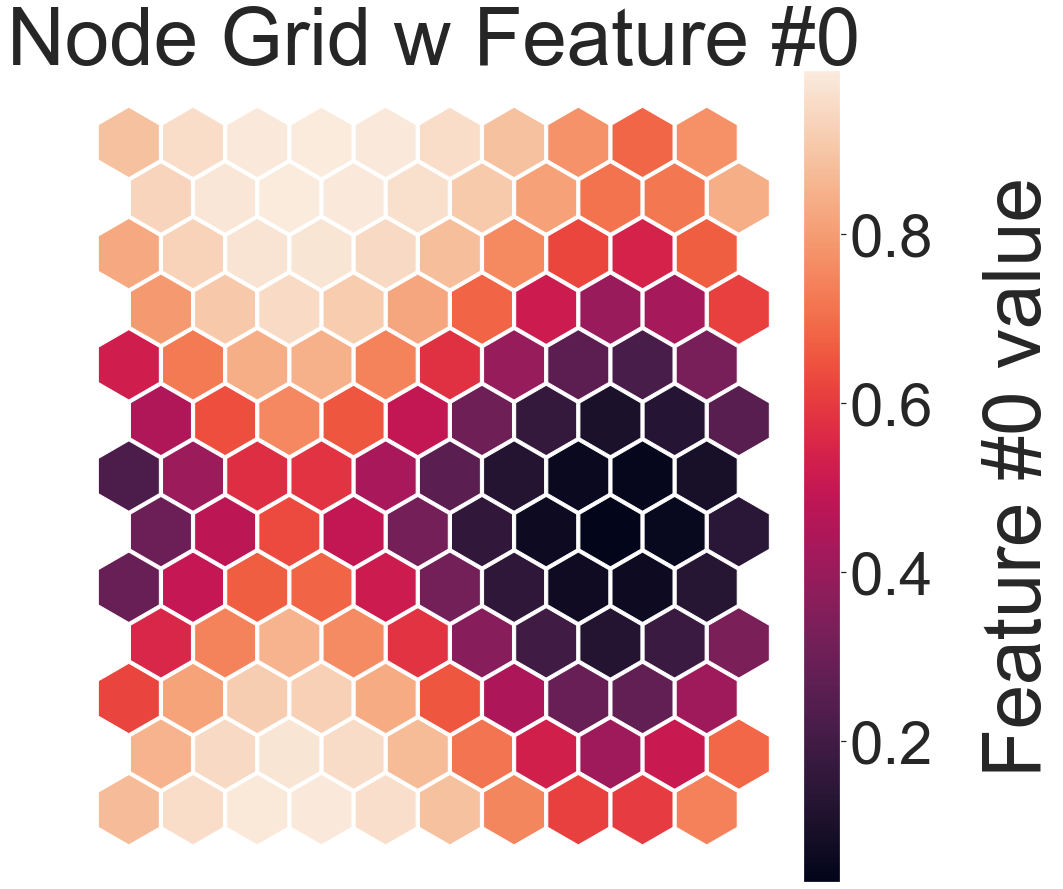

In [55]:
netX.nodes_graph(colnum=0)

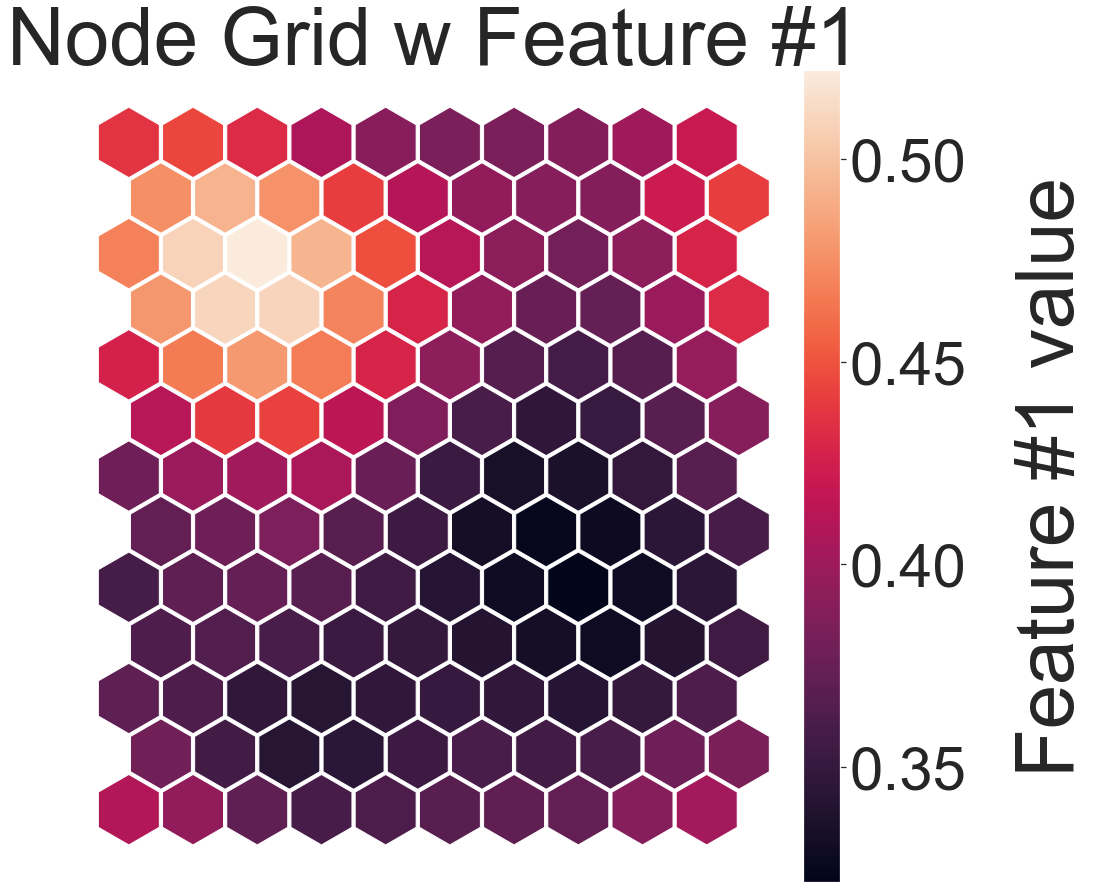

In [56]:
netX.nodes_graph(colnum=1)

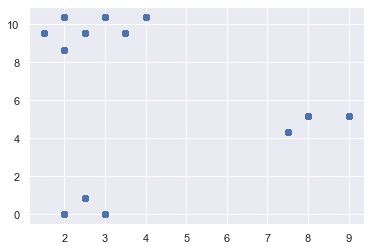

In [60]:
prjX=np.array(netX.project(X.values))
plt.scatter(prjX.T[0],prjX.T[1])
plt.show()

    Можна цілком чітко побачити виділення 3 кластерів. Припасуємо результати самонавчання карт Кохонена до 3 кластерів і порівняємо отримані 3 кластери з 3 кластерами, отриманими при використанні 2 найкращих змінних за методами k-means й ієрархічної кластеризації.

In [61]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeansX = KMeans(n_clusters=3, random_state=123).fit(prjX)

In [62]:
# Comparing Clustering Algorithms
adjusted_rand_score(kmX, kmeansX.labels_), adjusted_rand_score(hcX, kmeansX.labels_)

(0.632665577431773, 0.6241605349339032)

    Отримані результати повторюють результати інших алгоритмів лише на 62-63%, але це краще, ніж кращий показник, ніж при порівнянні 2 кластерів за картами Кохонена, отриманими з множини всіх ознак: тоді повторення результатів складало лише 25%.

    Таким чином, оптимальним число кластерів є 2, але отримані кластери абсолютно точно відповідають чоловікам і жінкам при методах k-means й ієрархічної кластеризації, але 2 кластери за картою Кохонена відповідають такому поділу лише на 25%.
    Зважаючи, що через наявність інших ознак, такий не є дуже інформативним, а тому було пророблено поділ вибірки на 3 кластери, які можна інтерпретувати наступним чином: жінки з низьким рівнем AST, чоловіки з низьким рівнем AST і чоловіки з високим рівнем AST. Власне стать і AST є тими характеристиками, які на 94,9% пояснюють такий поділ.
    За цими 2 ознаками також була проведена ієрархічна кластеризації, яка на 92% повторила результат за k-means, а для карт Кохонена цей показник виріс з 25% до 62-63. Можна зрозуміти, що при збільшенні числа ознак для кластеризації, результат збігу кластерів за різними алгоритмами збільшуватиметься.
    Таким чином, отриманий набір даних чітко поділяється за статтю суб'єктів, але це мало що може сказати досліднику. Тому необхідно розглядати можливість збільшення числа кластерів і важливих для їх виділення ознак залежно від поставлених задач, а не зупинятися на отриманих результатах кластеризації, навіть якщо вони є оптимальними за відповідними показниками і правилами, а також досить точно інтерпретованими, але по суті відкидають всі аспекти суб'єктів вибірки крім одного, що не дозволить зробити комплексний висновок щодо датасету та його кластеризації.